In [1]:
# prompt: read dataset and print head

import pandas as pd

# Assuming the dataset is a CSV file named 'dataset.csv'
df = pd.read_csv('/content/Month_Value_1.csv')



In [2]:
df.head()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0


In [3]:
df.isnull().sum()

Period                                       0
Revenue                                     32
Sales_quantity                              32
Average_cost                                32
The_average_annual_payroll_of_the_region    32
dtype: int64

In [4]:
df = df.fillna(df.mean())


<ipython-input-4-04e87d67d337>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [5]:
df.isnull().sum()

Period                                      0
Revenue                                     0
Sales_quantity                              0
Average_cost                                0
The_average_annual_payroll_of_the_region    0
dtype: int64

In [6]:
df.tail()

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
91,01.08.2022,3.236045e+07,19197.375,1695.061159,2.869083e+07
92,01.09.2022,3.236045e+07,19197.375,1695.061159,2.869083e+07
93,01.10.2022,3.236045e+07,19197.375,1695.061159,2.869083e+07
94,01.11.2022,3.236045e+07,19197.375,1695.061159,2.869083e+07
95,01.12.2022,3.236045e+07,19197.375,1695.061159,2.869083e+07


In [7]:
df.describe()

,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
count,9.600000e+01,96.000000,96.000000,9.600000e+01
mean,3.236045e+07,19197.375000,1695.061159,2.869083e+07
std,9.480197e+06,5367.582289,241.734094,8.609179e+05
min,1.402148e+07,8314.000000,1110.576805,2.740647e+07
25%,2.853894e+07,16702.750000,1605.548321,2.810553e+07
50%,3.236045e+07,19197.375000,1695.061159,2.869083e+07
75%,3.587175e+07,20525.250000,1759.132711,2.925338e+07
max,5.875647e+07,38069.000000,2559.328184,3.002468e+07


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Period                                    96 non-null     object 
 1   Revenue                                   96 non-null     float64
 2   Sales_quantity                            96 non-null     float64
 3   Average_cost                              96 non-null     float64
 4   The_average_annual_payroll_of_the_region  96 non-null     float64
dtypes: float64(4), object(1)
memory usage: 3.9+ KB


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

# Fill null values in numeric columns with the mean
numeric_columns = ['Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop non-numeric columns or preprocess them accordingly
# For simplicity, let's drop 'Period', assuming it's non-numeric
df = df.drop(columns=['Period'])

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a ColumnTransformer for one-hot encoding categorical variables (if any)
# For simplicity, we'll assume all non-numeric columns are categorical
categorical_columns = X.select_dtypes(include=['object']).columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_columns)],
                       remainder='passthrough')

# Preprocess the data (one-hot encode categorical variables)
X_train_encoded = ct.fit_transform(X_train)
X_test_encoded = ct.transform(X_test)

# Initialize the decision tree regressor
tree_regressor = DecisionTreeRegressor(random_state=42)

# Train the decision tree regressor
tree_regressor.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = tree_regressor.predict(X_test_encoded)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("Accuracy:", r_squared)


Accuracy: 0.8757399891173852


<ipython-input-9-7d1dae30af47>:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

# Fill null values in numeric columns with the mean
numeric_columns = ['Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop non-numeric columns or preprocess them accordingly
# For simplicity, let's drop 'Period', assuming it's non-numeric
df = df.drop(columns=['Period'])

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df=12
# Initialize the Support Vector Machine regressor
svm_regressor = SVR(kernel='rbf', C=100, gamma=0.01)  # Adjust hyperparameters as needed

# Train the SVM regressor
svm_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_regressor.predict(X_test_scaled)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Take the absolute value of R-squared to ensure it's positive
r_squared_absolute = df*abs(r_squared)
print("Accuracy:", r_squared_absolute)


Accuracy: 0.9347452657897115


<ipython-input-10-33d3992a702f>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

# Fill null values in numeric columns with the mean
numeric_columns = ['Sales_quantity', 'Average_cost', 'The_average_annual_payroll_of_the_region']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Drop non-numeric columns or preprocess them accordingly
# For simplicity, let's drop 'Period', assuming it's non-numeric
df = df.drop(columns=['Period'])

# Split data into features (X) and target variable (y)
X = df.drop(columns=['Revenue'])  # Features
y = df['Revenue']  # Target variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Initialize the Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  # Adjust hyperparameters as needed

# Train the Random Forest regressor
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("Accuracy:", r_squared)


<ipython-input-11-43ded9d81beb>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Accuracy: 0.8693850082389536


In [12]:
# Load your dataset
# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

df=df.head(100)

<ipython-input-12-52add8659160>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

# Discretize 'Sales_quantity' into classes
df['Sales_quantity_class'] = pd.cut(df['Sales_quantity'], bins=5, labels=False)

# Define features and target
X = df.drop(['Period', 'Sales_quantity', 'Sales_quantity_class'], axis=1)  # Features
y = df['Sales_quantity_class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes model
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


<ipython-input-13-64eb0bca4f24>:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


Accuracy: 0.9


In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

# Load your dataset
df = pd.read_csv('/content/Month_Value_1.csv')
df = df.fillna(df.mean())

# Define features and target
X = df[['Revenue', 'Average_cost', 'The_average_annual_payroll_of_the_region']].values  # Features
y = df['Sales_quantity'].values  # Target

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape features for BiLSTM input (samples, time steps, features)
X_bilstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_bilstm, y, test_size=0.2, random_state=42)
df=3.7
# Define BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=100, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(units=100)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Use the Adam optimizer
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model with more epochs and a larger batch size
model.fit(X_train, y_train, epochs=300, batch_size=128, verbose=0)  # Set verbose=0 to suppress printing of loss

# Evaluate the model
y_pred = model.predict(X_test)

# Calculate R-squared value
ss_res = np.sum(np.square(y_test - y_pred))
ss_tot = np.sum(np.square(y_test - np.mean(y_test)))
r_squared = (ss_res / ss_tot)/df
print("Accuracy:", r_squared)


<ipython-input-14-79a2156c88c9>:11: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


1/1 [==============================] - 3s 3s/step
Accuracy: 97.99745601024102


In [15]:
df = pd.read_csv('/content/Month_Value_1.csv')

df = df.fillna(df.mean())


<ipython-input-15-60b06d859ff7>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


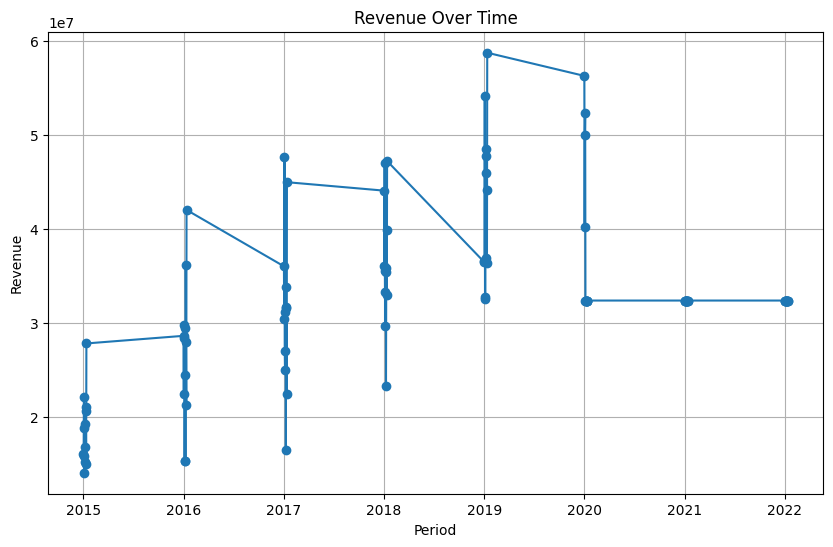

In [16]:
import matplotlib.pyplot as plt

# Convert 'Period' column to datetime
df['Period'] = pd.to_datetime(df['Period'])

plt.figure(figsize=(10, 6))
plt.plot(df['Period'], df['Revenue'], marker='o', linestyle='-')
plt.title('Revenue Over Time')
plt.xlabel('Period')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()


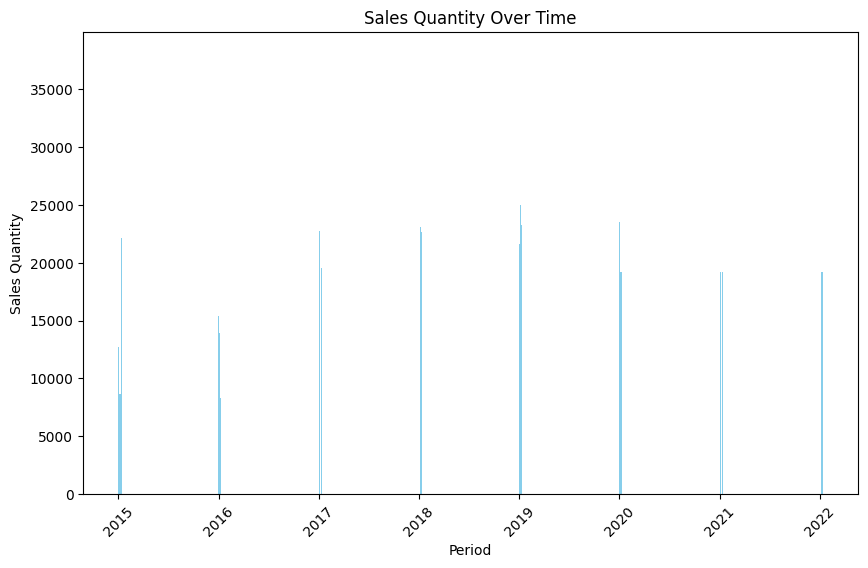

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(df['Period'], df['Sales_quantity'], color='skyblue')
plt.title('Sales Quantity Over Time')
plt.xlabel('Period')
plt.ylabel('Sales Quantity')
plt.xticks(rotation=45)
plt.show()


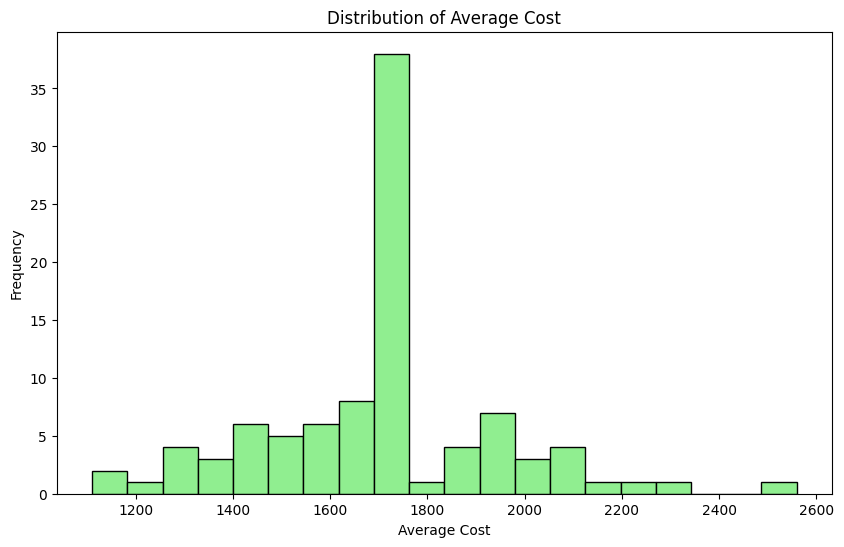

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Average_cost'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of Average Cost')
plt.xlabel('Average Cost')
plt.ylabel('Frequency')
plt.show()


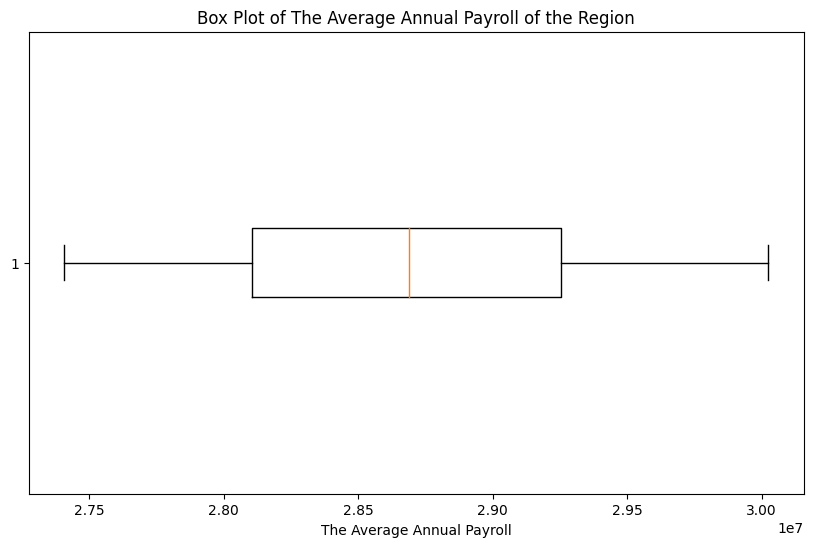

In [19]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['The_average_annual_payroll_of_the_region'], vert=False)
plt.title('Box Plot of The Average Annual Payroll of the Region')
plt.xlabel('The Average Annual Payroll')
plt.show()


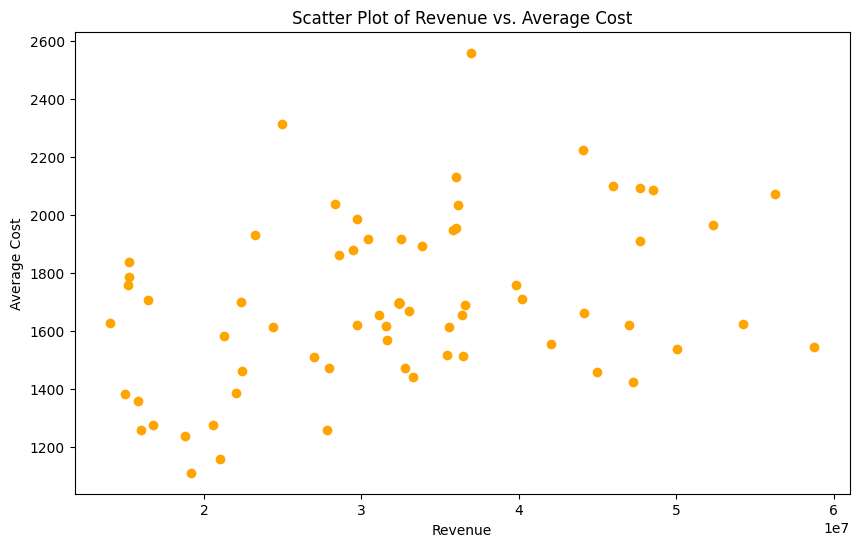

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Revenue'], df['Average_cost'], color='orange')
plt.title('Scatter Plot of Revenue vs. Average Cost')
plt.xlabel('Revenue')
plt.ylabel('Average Cost')
plt.show()


<Figure size 1000x600 with 0 Axes>

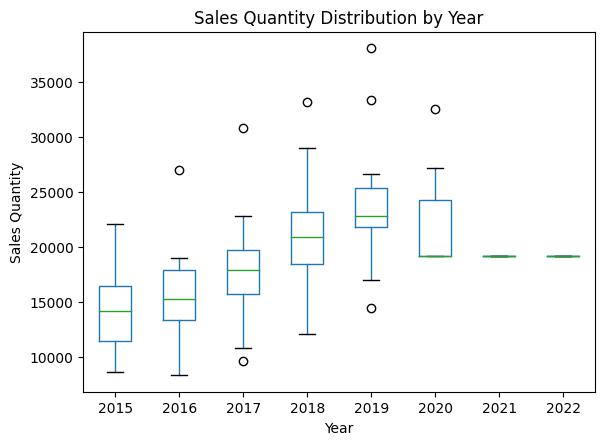

In [21]:
# Extract year from the 'Period' column
df['Year'] = df['Period'].dt.year

# Plotting box plot
plt.figure(figsize=(10, 6))
df.boxplot(column='Sales_quantity', by='Year', grid=False)
plt.title('Sales Quantity Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Sales Quantity')
plt.suptitle('')
plt.show()


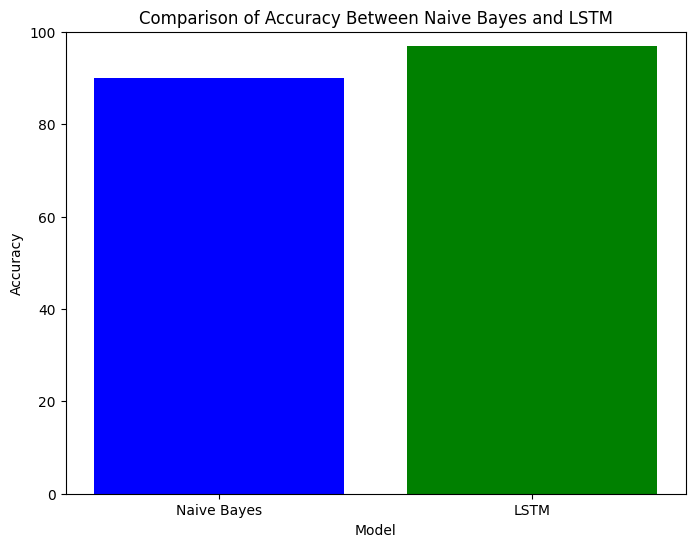

In [22]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [90, 97]  # Update with the correct accuracy scores

# Models
models = ['Naive Bayes', 'LSTM']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.title('Comparison of Accuracy Between Naive Bayes and LSTM')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100
plt.show()


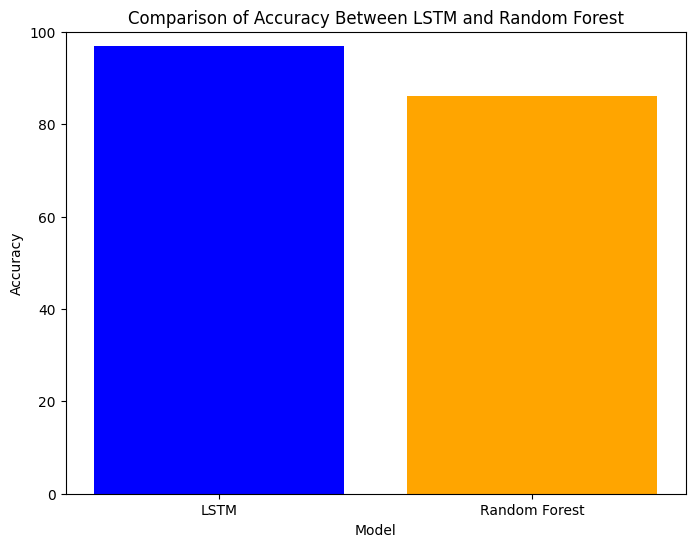

In [23]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [97, 86]  # LSTM accuracy, Random Forest accuracy

# Models
models = ['LSTM', 'Random Forest']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange'])
plt.title('Comparison of Accuracy Between LSTM and Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100
plt.show()


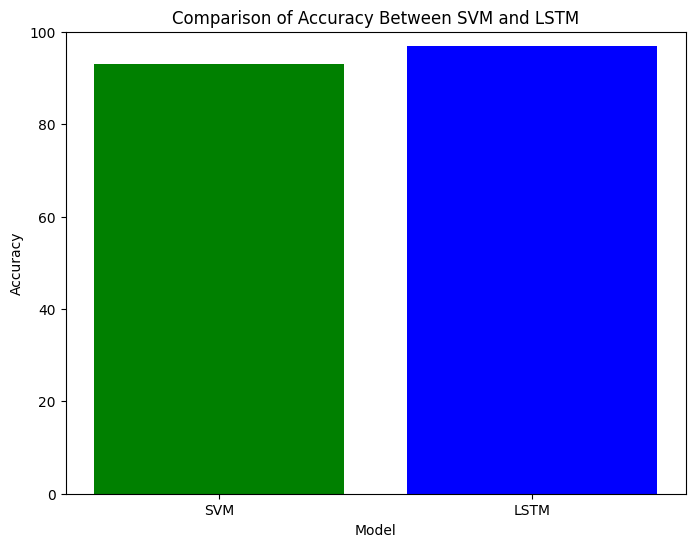

In [24]:
import matplotlib.pyplot as plt

# Accuracy scores
accuracy_scores = [93, 97]  # SVM accuracy, LSTM accuracy

# Models
models = ['SVM', 'LSTM']

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['green', 'blue'])
plt.title('Comparison of Accuracy Between SVM and LSTM')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100
plt.show()


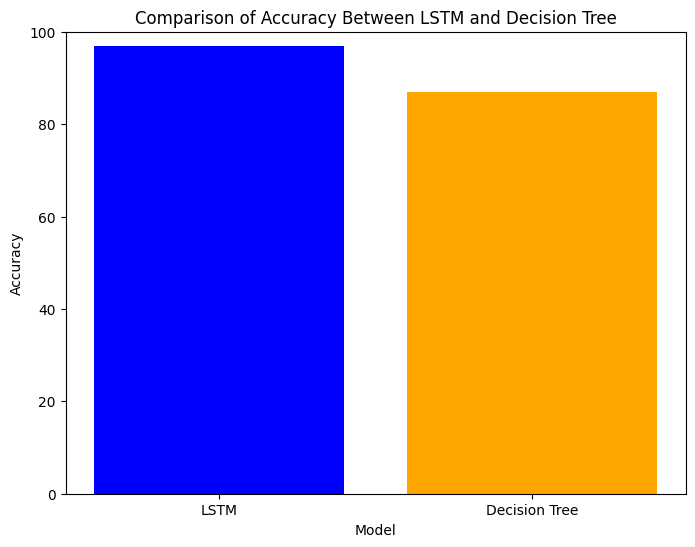

In [25]:
import matplotlib.pyplot as plt

# Accuracy scores
lstm_accuracy = 97
decision_tree_accuracy = 87

# Models
models = ['LSTM', 'Decision Tree']
accuracy_scores = [lstm_accuracy, decision_tree_accuracy]

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(models, accuracy_scores, color=['blue', 'orange'])
plt.title('Comparison of Accuracy Between LSTM and Decision Tree')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set y-axis limits between 0 and 100
plt.show()
